<a href="https://colab.research.google.com/github/lazypnkj/AIML-projects/blob/main/Sentiment_analysis_ixigo_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Reviews.csv', encoding = 'Windows-1252' )

In [20]:
df.head()

,Star Rating,Review Text
0,5,NaN
1,5,NaN
2,1,NaN
3,5,NaN
4,5,NaN


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Star Rating'].value_counts()

5    25461
4     4878
1     2027
3     1864
2      636
Name: Star Rating, dtype: int64

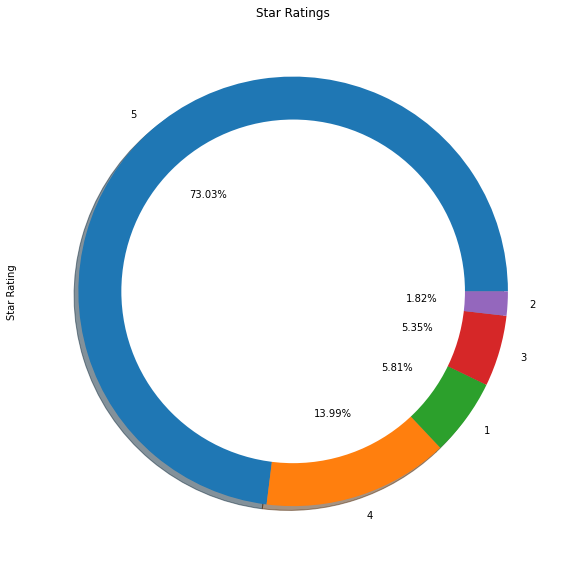

In [22]:
plt.figure(figsize=(8,10))

df['Star Rating'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow = True)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Star Ratings')


plt.tight_layout()
plt.show()

In [23]:
df.isnull().sum()

Star Rating        0
Review Text    28892
dtype: int64

In [24]:
df.dropna(inplace = True)

In [25]:
df.isnull().sum()

Star Rating    0
Review Text    0
dtype: int64

In [26]:
df.head()

,Star Rating,Review Text
9,5,Good morning ????????
10,5,Best app
18,3,Good app
21,4,Good
24,1,good


In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review Text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review Text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review Text"]]
df["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in df["Review Text"]]

score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment

df.head()

,Star Rating,Review Text,Positive,Negative,Neutral,Compound,Sentiment
9,5,Good morning ????????,0.659,0.0,0.341,0.5940,Positive
10,5,Best app,0.808,0.0,0.192,0.6369,Positive
18,3,Good app,0.744,0.0,0.256,0.4404,Positive
21,4,Good,1.000,0.0,0.000,0.4404,Positive
24,1,good,1.000,0.0,0.000,0.4404,Positive


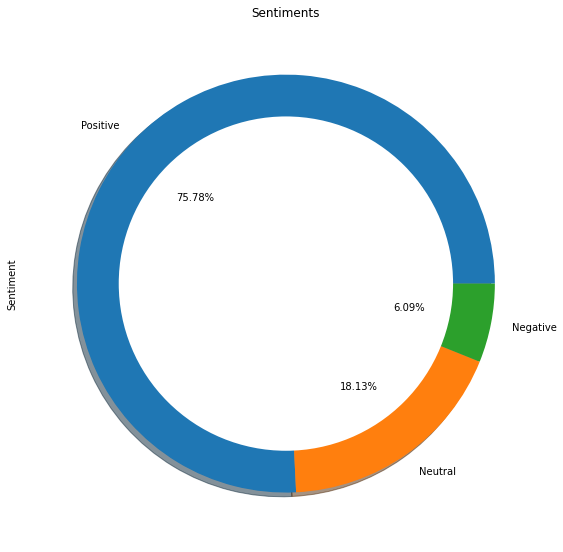

In [29]:
plt.figure(figsize=(8,10))

df['Sentiment'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow = True)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sentiments')


plt.tight_layout()
plt.show()

In [30]:
import string
def rmv_punc(text):
  punct = string.punctuation
  return text.translate(str.maketrans('', '', punct))

In [31]:
df['Review Text'] = df['Review Text'].apply(lambda x: rmv_punc(x))

In [32]:
import re
def rmv_char(text):
  text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
  text = re.sub('\s+',' ', text) #remove whitespace
  return text

In [33]:
df['Review Text'] = df['Review Text'].apply(lambda x: rmv_char(x).lower())

In [34]:
df.head()

,Star Rating,Review Text,Positive,Negative,Neutral,Compound,Sentiment
9,5,good morning,0.659,0.0,0.341,0.5940,Positive
10,5,best app,0.808,0.0,0.192,0.6369,Positive
18,3,good app,0.744,0.0,0.256,0.4404,Positive
21,4,good,1.000,0.0,0.000,0.4404,Positive
24,1,good,1.000,0.0,0.000,0.4404,Positive


In [37]:
from textblob import TextBlob
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import wordcloud
from PIL import Image
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
ignored_words = set(stopwords.words("english"))

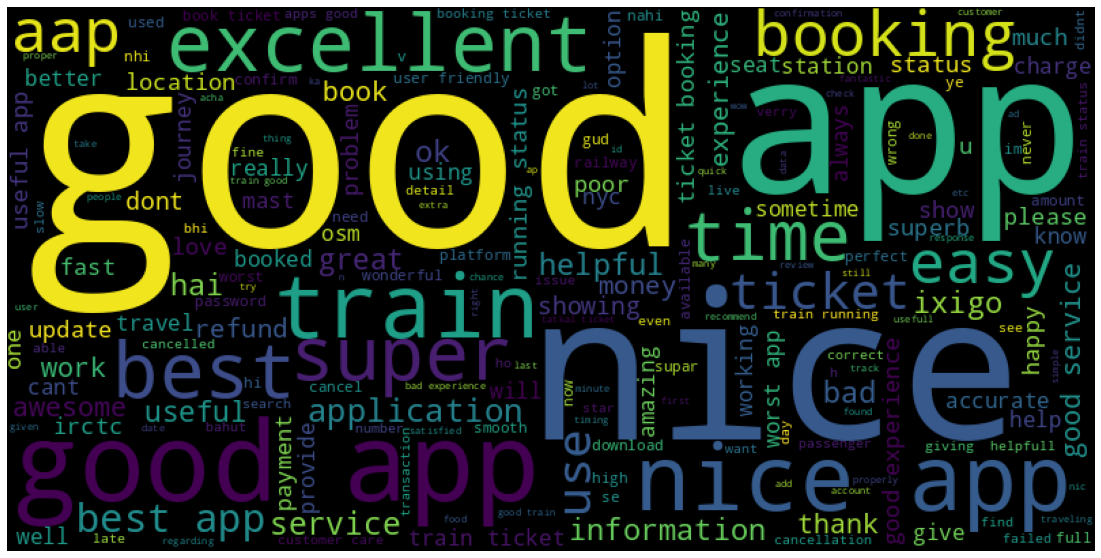

In [49]:
text3 = ' '.join(df['Review Text'])
wordcloud = WordCloud(width=800, height=400).generate(text3)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('WordCloudpos.png', facecolor='k', bbox_inches='tight')
plt.show()

In [40]:
negative_reviews = df[df['Sentiment'] == 'Negative']

In [41]:
negative_reviews

,Star Rating,Review Text,Positive,Negative,Neutral,Compound,Sentiment
113,1,bakbasapp bad,0.000,0.778,0.222,-0.5423,Negative
349,1,very poor discussing,0.000,0.629,0.371,-0.5256,Negative
646,1,not comfortable,0.000,0.730,0.270,-0.4023,Negative
693,1,current location no show,0.000,0.423,0.577,-0.2960,Negative
776,2,before ticket confirm percentage given were aq...,0.000,0.135,0.865,-0.4782,Negative
...,...,...,...,...,...,...,...
34269,1,wrong information not real time waste app,0.224,0.297,0.479,-0.1945,Negative
34309,1,very poor app never worked,0.000,0.459,0.541,-0.5256,Negative
34431,1,not able to upload address details while new r...,0.000,0.255,0.745,-0.7584,Negative
34642,1,ixigo is fraud company my ticket is failed but...,0.000,0.233,0.767,-0.5499,Negative


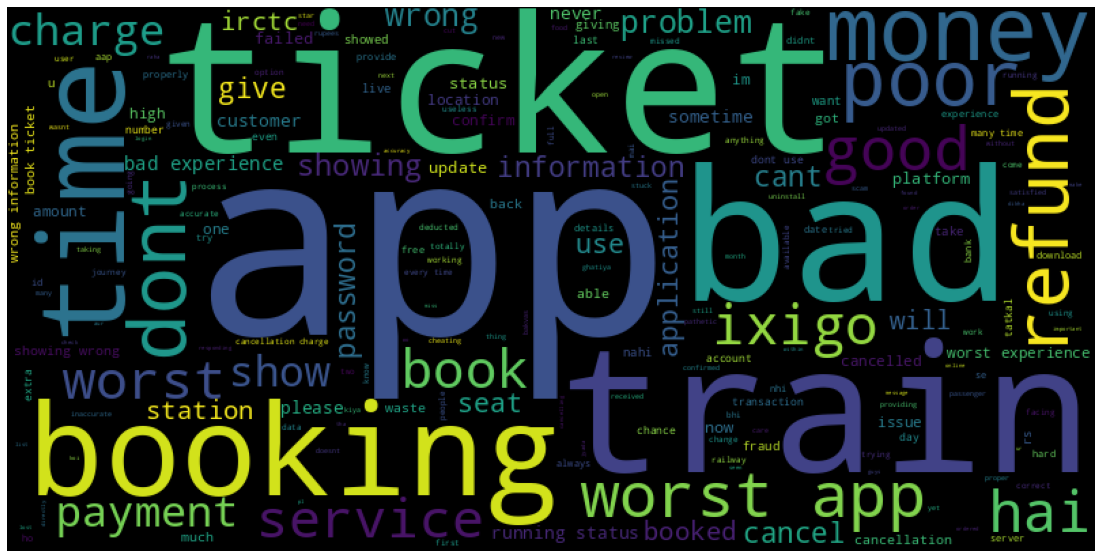

In [48]:
text4 = ' '.join(negative_reviews['Review Text'])
wordcloud3 = WordCloud(width=800, height=400).generate(text4)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud3)
plt.axis("off")
plt.savefig('WordCloud_neg.png', facecolor='k', bbox_inches='tight')
plt.show()